In [83]:
import os
# os.chdir(os.path.dirname(os.path.abspath(__file__)))
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import torch


In [84]:
inliers = pickle.load(open("../processed_data/test_set/inliers.pkl", "rb"))
problems = pickle.load(open("../processed_data/test_set/problems.pkl", "rb"))
positions = pickle.load(open("../processed_data/test_set/positions.pkl", "rb"))


# "Measurement noise" - i.e. Residual between ground_truth computed tdoa and measurements 

inlier_ration = 0.72, (|res| < 0.2 m)
noise_std = 0.12, (|res| < 0.4 m)


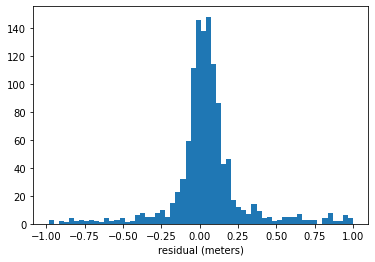

In [119]:
sender_size = problems[0].shape[1]
mic_pairs = zip(*np.tril_indices(12, k=-1))
prob = 0
gt_tdoa = np.zeros((66, sender_size))
for indx, (i, j) in enumerate(mic_pairs):
    d1 = np.linalg.norm(positions[prob]["speaker"] -
                        positions[prob]["mics"][i], axis=1)
    d2 = np.linalg.norm(positions[prob]["speaker"] -
                        (positions[prob]["mics"][j]), axis=1)
    gt_tdoa[indx] = d1 - d2
# plt.hist(d1 - d2)
# d1.shape
# plt.hist(gt_tdoa.flatten())
res = (gt_tdoa - problems[prob]*343/96e3).flatten()
plt.hist(res[np.abs(res) < 1], 60)
plt.xlabel("residual (meters)")
inl_ratio = np.sum(np.abs(res) < 0.2)/np.size(res)
noise_std = np.std(res[np.abs(res) < 0.4])
print(f'inlier_ration = {inl_ratio:.2f}, (|res| < 0.2 m)')
print(f'noise_std = {noise_std:.2f}, (|res| < 0.4 m)')


# room size

In [108]:
coord = torch.cat([torch.cat([p["speaker"] for p in positions]), torch.cat(
    [p["mics"] for p in positions])])  # coordinates of all speakers and mics

print(coord.max(dim=0)[0])
print(coord.min(dim=0)[0])

u, s, v = torch.svd(coord)

s/np.sqrt(coord.shape[0])


tensor([2.8930, 3.5974, 0.2058], dtype=torch.float64)
tensor([-0.0111, -0.8671, -4.4453], dtype=torch.float64)


tensor([2.9225, 1.1236, 0.5446], dtype=torch.float64)

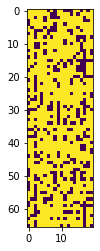

In [121]:
plt.imshow(inliers[0])
